# Logistic Regression

### setup

In [24]:
# import needed libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Helper libraries

print(tf.__version__)

2.20.0


In [25]:
#setting a random seed for reproducibility
import random
random.seed(4)
tf.random.set_seed(4)
np.random.seed(4)


In [26]:
#getting the data
import json

with open('realAccountData.json', 'r') as f:
            realData = json.load(f)
with open('fakeAccountData.json', 'r') as f:
            fakeData = json.load(f)
allData = realData + fakeData #note that the data is ordered right now
random.shuffle(allData) #so this shuffles the list just in case

In [27]:
#turning into numpy arrays
numpy_real = np.array(realData)
# print(numpy_real[1]) #making sure things work
numpy_fake = np.array(fakeData)
# print(numpy_fake[1]) #making sure things work
numpy_all = np.array(allData)
# print(numpy_all[1]) #making sure things work

#and making a dataframe
allData_df = pd.DataFrame(allData)

In [28]:
cols = allData_df.shape[1]
X = allData_df.iloc[:,0:cols-1] # iloc slicing function
Y = allData_df.iloc[:,cols-1:cols]

In [29]:
#train test split being made
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# and standardizing the X data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=4)  #getting validation set



scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) #you have to do this
x_val = scaler.transform(x_val) #you have to do this



In [30]:
print (x_train.shape, y_train.shape)
print (x_val.shape, y_val.shape)
print (x_test.shape, y_test.shape)

(716, 8) (716, 1)
(179, 8) (179, 1)
(299, 8) (299, 1)


In [31]:
# defining the stopping parameter for early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)


## Defining the First Neural Network (1 layer)

In [32]:
layers1 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(50, activation = "relu"),
    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model1 = Sequential(layers1)

model1.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=16, epochs= 100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8156 - loss: 0.5904 - val_accuracy: 0.7989 - val_loss: 0.5557
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8925 - loss: 0.4175 - val_accuracy: 0.8268 - val_loss: 0.4199
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9120 - loss: 0.3106 - val_accuracy: 0.8715 - val_loss: 0.3407
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9274 - loss: 0.2468 - val_accuracy: 0.8771 - val_loss: 0.2949
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9344 - loss: 0.2097 - val_accuracy: 0.8771 - val_loss: 0.2675
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9372 - loss: 0.1872 - val_accuracy: 0.8827 - val_loss: 0.2498
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9441 - loss: 0.1724 - val_accuracy: 0.8883 - val_loss: 0.2375
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9483 - loss: 0.1619 - val_accuracy: 0.8939 - v

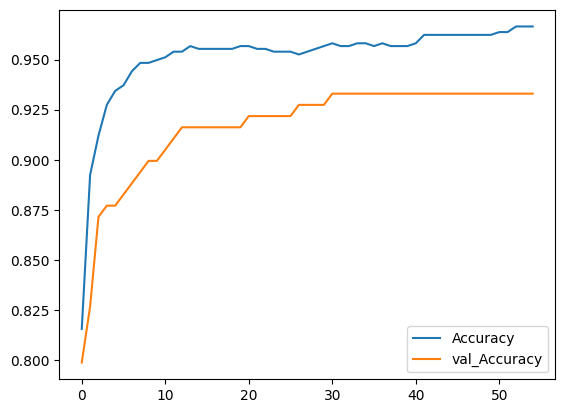

In [33]:
plt.plot(history1.history['accuracy'], label="Accuracy")
plt.plot(history1.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


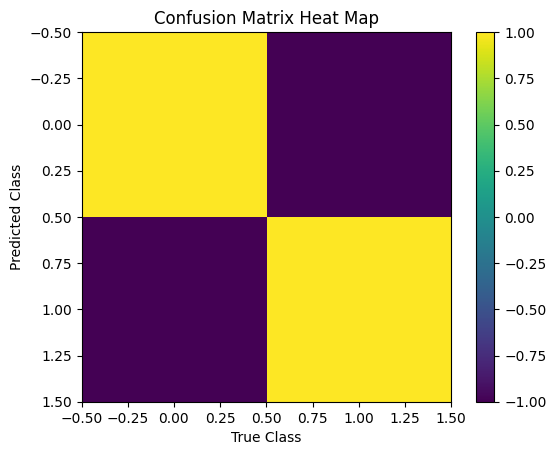

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       246
           1       0.94      0.83      0.88        53

    accuracy                           0.96       299
   macro avg       0.95      0.91      0.93       299
weighted avg       0.96      0.96      0.96       299

specificity: 0.9878048780487805
recall: 0.8301886792452831
precision: 0.9361702127659575
accuracy: 0.959866220735786


In [34]:
#model 1 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

y_test_array = np.ravel(y_test)
network1_pred = model1.predict(x_test)
network1_pred = (network1_pred > 0.5).astype(int)
conf_matrix1 = confusion_matrix(y_true = y_test, y_pred = network1_pred)
conf_matrix_scaler1 = preprocessing.StandardScaler().fit(conf_matrix1)
conf_matrix_scaled1 = conf_matrix_scaler1.transform(conf_matrix1)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled1)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network1_report = classification_report(y_true = y_test, y_pred = network1_pred)
print(network1_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix1.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")


#note, the low recall is not that huge of a problem, as we are trying to have as high of a precision as possible

## defining the next neural network (2 layers)

In [35]:
#for some reason, I need to define early stopping again each time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [36]:
layers2 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(50, activation = "relu"),
    Dense(50, activation = "relu"),
    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model2 = Sequential(layers2)

model2.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, batch_size=16, epochs= 100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8799 - loss: 0.4525 - val_accuracy: 0.8659 - val_loss: 0.3358
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9064 - loss: 0.2464 - val_accuracy: 0.8883 - val_loss: 0.2485
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.1818 - val_accuracy: 0.8939 - val_loss: 0.2263
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9441 - loss: 0.1553 - val_accuracy: 0.9050 - val_loss: 0.2104
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9483 - loss: 0.1388 - val_accuracy: 0.9106 - val_loss: 0.1959
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9525 - loss: 0.1269 - val_accuracy: 0.9106 - val_loss: 0.1845
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9539 - loss: 0.1167 - val_accuracy: 0.9106 - val_loss: 0.1751
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9539 - loss: 0.1086 - val_accuracy: 0.9162 - v

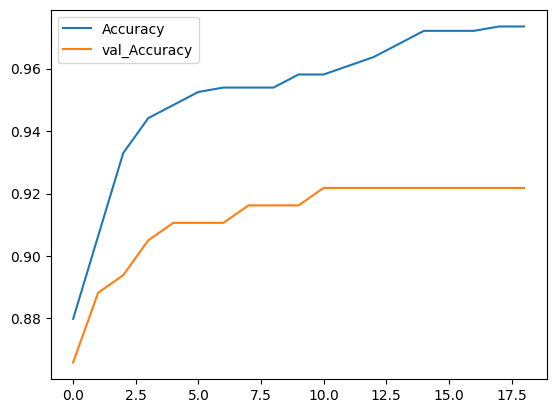

In [37]:
plt.plot(history2.history['accuracy'], label="Accuracy")
plt.plot(history2.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


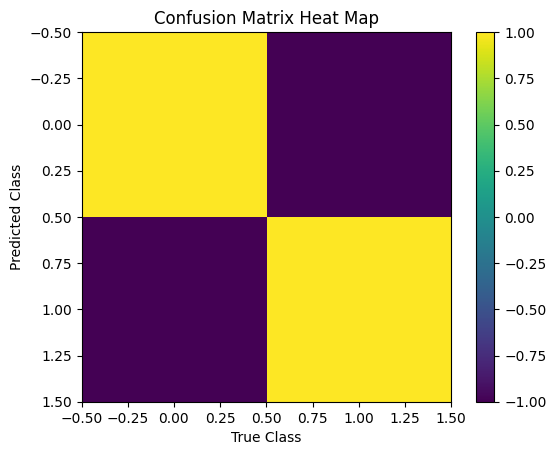

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       246
           1       0.98      0.79      0.88        53

    accuracy                           0.96       299
   macro avg       0.97      0.89      0.93       299
weighted avg       0.96      0.96      0.96       299

specificity: 0.9959349593495935
recall: 0.7924528301886793
precision: 0.9767441860465116
accuracy: 0.959866220735786


In [39]:
#model 2 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

network2_pred = model2.predict(x_test)
network2_pred = (network2_pred > 0.5).astype(int)
conf_matrix2 = confusion_matrix(y_true = y_test, y_pred = network2_pred)
conf_matrix_scaler2 = preprocessing.StandardScaler().fit(conf_matrix2)
conf_matrix_scaled2 = conf_matrix_scaler2.transform(conf_matrix2)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled2)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network2_report = classification_report(y_true = y_test, y_pred = network2_pred)
print(network2_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix2.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")

## defining the next neural network (5 layers, each are small)

In [44]:
#for some reason, I need to define early stopping again each time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [45]:
layers3 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(20, activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(20, activation = "relu"),

    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model3 = Sequential(layers3)

model3.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, batch_size=16, epochs= 100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8436 - loss: 0.5445 - val_accuracy: 0.8045 - val_loss: 0.5148
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8561 - loss: 0.3675 - val_accuracy: 0.8659 - val_loss: 0.3455
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9204 - loss: 0.2103 - val_accuracy: 0.8827 - val_loss: 0.2708
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9455 - loss: 0.1537 - val_accuracy: 0.8883 - val_loss: 0.2464
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9483 - loss: 0.1297 - val_accuracy: 0.8883 - val_loss: 0.2320
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9581 - loss: 0.1144 - val_accuracy: 0.8939 - val_loss: 0.2122
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9637 - loss: 0.1043 - val_accuracy: 0.9050 - val_loss: 0.1978
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9651 - loss: 0.0967 - val_accuracy: 0.9050 - v

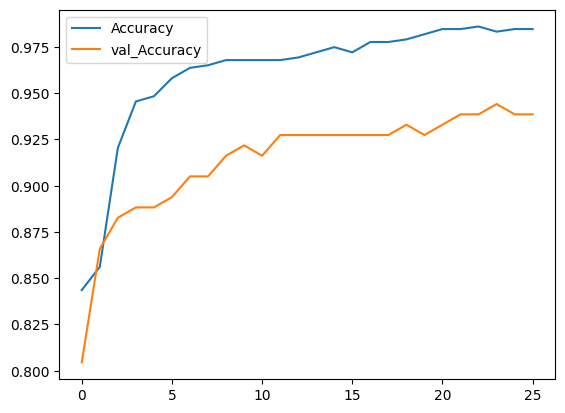

In [46]:
plt.plot(history3.history['accuracy'], label="Accuracy")
plt.plot(history3.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


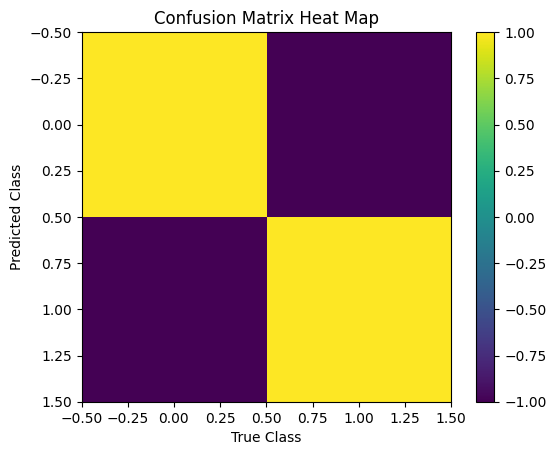

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       246
           1       0.98      0.83      0.90        53

    accuracy                           0.97       299
   macro avg       0.97      0.91      0.94       299
weighted avg       0.97      0.97      0.97       299

specificity: 0.9959349593495935
recall: 0.8301886792452831
precision: 0.9777777777777777
accuracy: 0.9665551839464883


In [47]:
#model 3 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

network3_pred = model3.predict(x_test)
network3_pred = (network3_pred > 0.5).astype(int)
conf_matrix3 = confusion_matrix(y_true = y_test, y_pred = network3_pred)
conf_matrix_scaler3 = preprocessing.StandardScaler().fit(conf_matrix3)
conf_matrix_scaled3 = conf_matrix_scaler3.transform(conf_matrix3)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled3)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network3_report = classification_report(y_true = y_test, y_pred = network3_pred)
print(network3_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix3.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")

## exploratory model with 10 hidden layers (more than the number of features)

In [56]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

layers4 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(10, activation = "relu"),
    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model4 = Sequential(layers4)

model4.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, batch_size=16, epochs= 100, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8436 - loss: 0.5999 - val_accuracy: 0.8045 - val_loss: 0.5175
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8436 - loss: 0.4226 - val_accuracy: 0.8045 - val_loss: 0.4333
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8436 - loss: 0.3384 - val_accuracy: 0.8045 - val_loss: 0.3387
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8436 - loss: 0.2633 - val_accuracy: 0.8045 - val_loss: 0.2845
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8939 - loss: 0.2222 - val_accuracy: 0.9106 - val_loss: 0.2460
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9330 - loss: 0.1966 - val_accuracy: 0.9218 - val_loss: 0.2297
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9330 - loss: 0.1749 - val_accuracy: 0.9218 - val_loss: 0.2143
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9413 - loss: 0.1570 - val_accuracy: 0.9162 - v

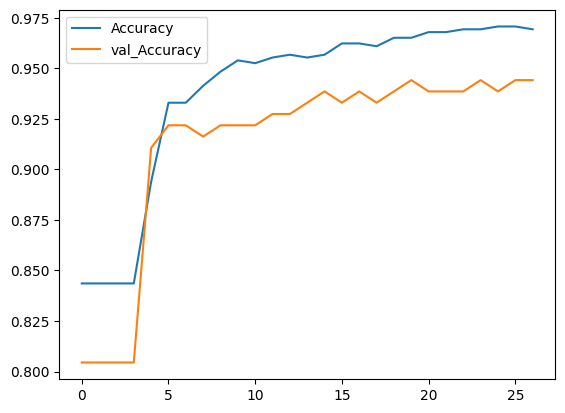

In [57]:
plt.plot(history4.history['accuracy'], label="Accuracy")
plt.plot(history4.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


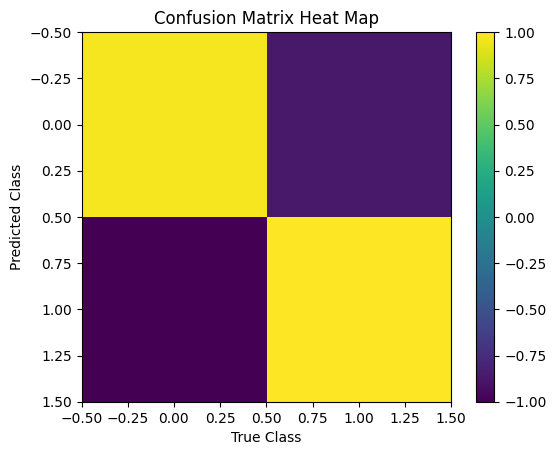

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       246
           1       0.92      0.83      0.87        53

    accuracy                           0.96       299
   macro avg       0.94      0.91      0.92       299
weighted avg       0.96      0.96      0.96       299

specificity: 0.983739837398374
recall: 0.8301886792452831
precision: 0.9166666666666666
accuracy: 0.9565217391304348


In [58]:
#model 4 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

network4_pred = model4.predict(x_test)
network4_pred = (network4_pred > 0.5).astype(int)
conf_matrix4 = confusion_matrix(y_true = y_test, y_pred = network4_pred)
conf_matrix_scaler4 = preprocessing.StandardScaler().fit(conf_matrix4)
conf_matrix_scaled4 = conf_matrix_scaler3.transform(conf_matrix4)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled4)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network4_report = classification_report(y_true = y_test, y_pred = network4_pred)
print(network4_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix4.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")